# Método K-Means

El método K-Means es un método de clustering en el que se define el número de clusters a generar.

In [91]:
import numpy as np

Construimos 30 puntos aleatorios con coordenadas $(x,y,z)$

In [92]:
data =  np.random.random(90).reshape(30,3)
data

array([[0.22361558, 0.34757594, 0.88097603],
       [0.6602839 , 0.95074513, 0.84599184],
       [0.31780285, 0.52334666, 0.7673239 ],
       [0.91890715, 0.54814129, 0.01130979],
       [0.39314868, 0.76853162, 0.39846266],
       [0.86215871, 0.16076436, 0.85272362],
       [0.59673272, 0.78254708, 0.22454876],
       [0.31813669, 0.75621354, 0.36366081],
       [0.64890341, 0.95662598, 0.27020439],
       [0.94886496, 0.0130143 , 0.17309103],
       [0.01389724, 0.50196555, 0.05042033],
       [0.63700533, 0.83697703, 0.11927449],
       [0.88591702, 0.36218547, 0.98108888],
       [0.08131129, 0.43554698, 0.94271076],
       [0.40299925, 0.34648932, 0.98623047],
       [0.68489069, 0.89365768, 0.74628148],
       [0.92937442, 0.06390723, 0.00477345],
       [0.55177226, 0.87262776, 0.79680001],
       [0.55669283, 0.83317895, 0.07255266],
       [0.27739445, 0.35040344, 0.30456365],
       [0.98957491, 0.98547298, 0.8425224 ],
       [0.17346922, 0.19393977, 0.24050206],
       [0.

Se definirán dos clusters con base a dos puntos generados aleatoriamente. Estos puntos se tomarán como los **centroides** de los clusters que se van a construir.

In [93]:
# elige los centroides aleatoriamente
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
clust_centers = np.vstack([data[c1], data[c2]]) # agrupa verticalmente
clust_centers

array([[0.55177226, 0.87262776, 0.79680001],
       [0.26765541, 0.94476733, 0.6416675 ]])

In [94]:
from scipy.cluster.vq import vq

El paquete `vq` recibe un conjunto de observaciones y un conjunto de centroides dentro de las observaciones, calcula la **pertenencia** de cada observación en relación a los centroides con base en el cálculo de las distancias a de cada observacion a cada uno de los centroides. 

In [95]:
vq(data, clust_centers)

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1], dtype=int32),
 array([0.62486145, 0.14246731, 0.42143542, 0.92578312, 0.32550911,
        0.77859919, 0.55551357, 0.339689  , 0.53242418, 1.13385661,
        0.78105047, 0.64879317, 0.63731189, 0.62020685, 0.57865272,
        0.1439267 , 1.1932805 , 0.        , 0.64798635, 0.68337566,
        0.45441802, 0.85647346, 0.49770018, 0.75237502, 0.26050431,
        0.47562768, 0.        , 0.90570131, 0.37328923, 0.60957309]))

El paquete `kmeans` elabora los clusters mostrando la información de los baricentro de cada cluster y la suma del cuadrado de los errores.

from scipy.cluster.vq import kmeans

In [96]:
kmeans(data, clust_centers) # toma los centroides calculados anteriormente

(array([[0.5901949 , 0.60391615, 0.85436335],
        [0.49459008, 0.54751269, 0.20649894]]), 0.40737219944450026)

In [97]:
kmeans(data, 2) # toma el número de clusters y calcula los centroides

(array([[0.49459008, 0.54751269, 0.20649894],
        [0.5901949 , 0.60391615, 0.85436335]]), 0.40737219944450026)

## Clustering completo

Vamos a desarrollar un ejemplo completo de agrupamiento con un conjunto de datos reales. Se desea agrupar varios productos en categorías para definir un precio común o similar en cada uno de los productos pertenecientes a la misma categoría. 

In [2]:
import pandas as pd

In [3]:
mainpath = "/home/oscar/Documentos/udemy/machine-learning-joanby/python-ml-course-master/datasets"
filename = "/wine/winequality-red.csv"
fullpath = mainpath + filename

In [4]:
data = pd.read_csv(fullpath, sep=";")
data.shape

(1599, 12)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

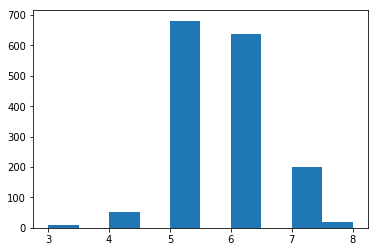

In [7]:
plt.hist(data["quality"])

In [8]:
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de datos 

La normalización de datos es importante para trabajar en un mismo rango con cada una de las varibles del conjunto de datos. Existen varios tipos de normalización, en particular utilizaremos el escalamiento que trae todos los valores en el rango de [0,1]: $$x^{'}=\frac{x-x_{min}}{x_{max}-x_{min}}$$ Esta normalización también se conoce como **normalización basada en la unidad**.

In [9]:
data_norm =(data-data.min())/(data.max()-data.min())
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerárquico con Scikit-Learn

La biblioteca de `scikit-learn` para realizar clustering jerárquico es `AgglomerativeClustering()` 

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
# se pasan como parámetros: numero de clusters, el tipo de enlace y los datos
clus = AgglomerativeClustering(n_clusters = 6, linkage="ward").fit(data_norm)

`AgglomerativeClustering()` devuelve un objeto el cual describe el cluster al cual pertenece cada punto   

In [30]:
clus.labels_

array([2, 2, 2, ..., 4, 4, 0])

In [31]:
# convierte las etiquetas a una serie
md_h = pd.Series(clus.labels_)

Text(0,0.5,'Número de vinos del cluster')

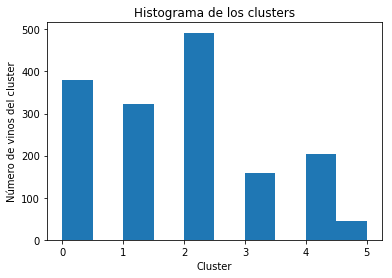

In [32]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

Lo anterior nos sugiere que hay más vinos de baja calidad que aquellos que han sido clasificados en el dataset original.

In [33]:
# describe los hijos de los nodos hoja
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [34]:
# funciones de scipy para crear el dendrograma
from scipy.cluster.hierarchy import dendrogram,linkage

In [35]:
z = linkage(data_norm, "ward")

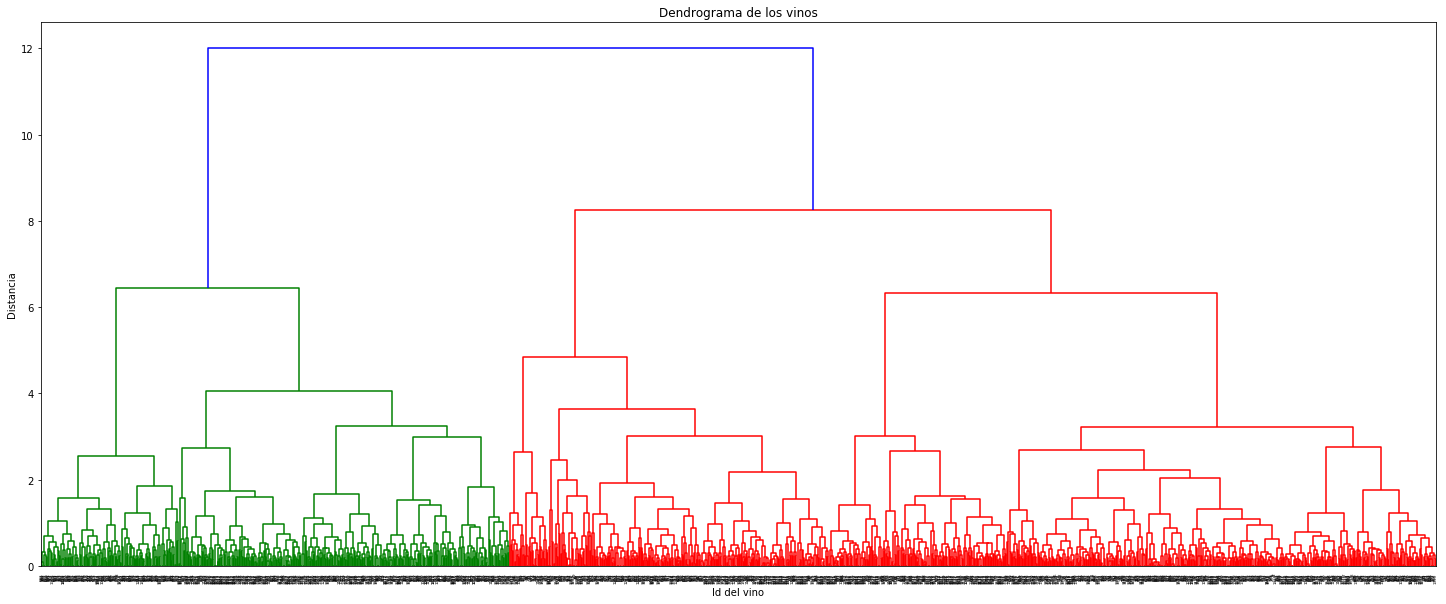

In [36]:
plt.figure(figsize= (25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("Id del vino")
plt.ylabel("Distancia")
dendrogram(z, leaf_rotation =90, leaf_font_size = 4)
plt.show()

### Clustering K-Means con Scikit-Learn

In [52]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [53]:
model = KMeans(n_clusters = 6)
model.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
# muestra las categorías creadas
model.labels_

array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

In [55]:
# convierte a serie
md_k = pd.Series(model.labels_)

In [56]:
# agrega a los datos normalizados las etiquetas de los clusters
# jerárquico y k-means 
data_norm["clust_h"] = md_h
data_norm["clust_k"] = md_k

In [57]:
data_norm.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,2,1
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,2,1
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,2,1
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,2,1
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,1,3


Podemos observar la pertenencia de cada observación a cada cluster de acuerdo al tipo de construcción, sea jerárquica o por k-means. 

(array([245.,   0., 473.,   0., 338.,   0., 284.,   0.,  95., 164.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

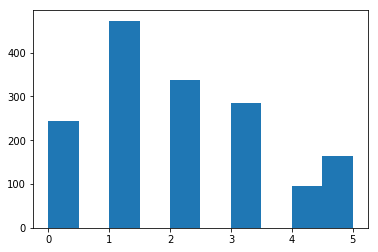

In [58]:
plt.hist(md_k)

Con k-means los clusters se reajustan, sin embargo, éstos tienen una estructura muy similar al cluster jerárquico.

El atributo `cluster_centers_` devuelve los centroides de los clusters. Para este caso las coordenadas de los centroides están normalizadas.

In [121]:
model.cluster_centers_

array([[0.57811162, 0.20469233, 0.50322581, 0.13115886, 0.12972562,
        0.13499546, 0.09107489, 0.65625444, 0.33296292, 0.22423701,
        0.28285773, 0.54354839],
       [0.17445137, 0.32428282, 0.0929148 , 0.0939554 , 0.09588477,
        0.24758416, 0.12386506, 0.32278435, 0.57911091, 0.18627319,
        0.49233069, 0.61434978],
       [0.370517  , 0.15927232, 0.43045113, 0.10706561, 0.10696399,
        0.16626072, 0.08472595, 0.41529485, 0.41741164, 0.23733736,
        0.48935801, 0.69699248],
       [0.26335121, 0.35745359, 0.1227027 , 0.09149389, 0.12339743,
        0.14529066, 0.10716673, 0.49020717, 0.48645608, 0.15538807,
        0.22292347, 0.44092664],
       [0.31578358, 0.27865441, 0.30306962, 0.15220218, 0.12697851,
        0.38204225, 0.29838529, 0.53909692, 0.43636001, 0.17903434,
        0.21429731, 0.45696203],
       [0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451,

Un factor de eficicencia de cluster es el **factor de inercia** que se calcula con el atributo `inertia_`. Este calcula el valor de la distancia de cada una de las observaciones a su centroides elevadas al cuadrado.


In [122]:
model.inertia_

186.59486523884675

### Interpretación final

In [123]:
# Se agrupan los datos normalizados
data_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.578112,0.204692,0.503226,0.131159,0.129726,0.134995,0.091075,0.656254,0.332963,0.224237,0.282858,0.543548,2.056452
1,0.174451,0.324283,0.092915,0.093955,0.095885,0.247584,0.123865,0.322784,0.579111,0.186273,0.492331,0.614350,3.434978
2,0.370517,0.159272,0.430451,0.107066,0.106964,0.166261,0.084726,0.415295,0.417412,0.237337,0.489358,0.696992,0.109023
3,0.263351,0.357454,0.122703,0.091494,0.123397,0.145291,0.107167,0.490207,0.486456,0.155388,0.222923,0.440927,2.001931
4,0.315784,0.278654,0.303070,0.152202,0.126979,0.382042,0.298385,0.539097,0.436360,0.179034,0.214297,0.456962,1.056962
5,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000


Podemos ofrecer un precio al conjunto de vinos dentro del cluster que contenga, por ejemplo, la mayor *fixed acidity*, en nuestro caso, aquellos dentro del cluter 0. Otra interpretación, es darle publicidad a aquellos vinos con mayor grados de alcohol, clusters 1, 2.   

## Ajustar o afinar los parámetros del clustering

Definir un número óptimo de clusters es de gran importancia al hacer el agrupamiento, en particular para el método de K-means. Revisaremos dos métodos para calcular el número óptimo de clusters: el **método del codo** y el **método de la silueta**.


### Método del codo

El método del codo mide la compacidad de las observaciones del cluster. Si un cluster está bien compactado la clasificiación es correcta. Para conocer esta compacidad se calcula la distancia de cada punto al baricentro respectivo y se eleva al cuadrado (suma de los cuadarados internos $SSw(k)$). A medida que aumenta el número de clusters, el valor de $SSw(k)$ va disminuyendo. 

![Codo](imagenes\ejemplo-elbow.png "codo")

### Método de la silueta

Este método calcula un coeficiente que ayuda a determinar el número óptimo de clusters. Para cada observación el **coeficiente de la silueta** cuantifica la bondad de agrupamiento al las demás observaciones de su mismo cluster y qué tan bien está de alejado del cluster vecino más cercano:
* $a(i)$: el promedio de la distancial del punto $i$ a cada uno de los otros puntos del mismo cluster (cuanto menor sea el valor, mejor ha sido asignado el punto).
* $b(i)$: la menor distancia promedio del punto $i$ a cualquier otro cluster que no contenga a $i$ (dicho cluster es el vencino nmás cercano de $i$ ya que es la mejor alternativa de clasificación del punto)

El coeficiente de silueta está definido como:
$$S(i) =  \frac{b(i)-a(i)}{max\{a(i), b(i)\}}$$


$$S(i)=\begin{cases}
 1-\frac{a(i)}{b(i)} & \text{ si } a(i) < b(i) \\ 
 0 & \text{ si } a(i) = b(i) \\ 
 \frac{b(i)}{a(i)}-1 & \text{ si } a(i) > b(i) 
\end{cases}$$

donde: $-1 \le S(i) \le 1$

* Cuando $S(i) \rightarrow 1$ entonces $a(i) << b(i)$ y por tanto el punto está correctamente clasificado.
* Cuando $S(i) \rightarrow -1$ entonces $a(i) >> b(i)$ y por tanto el punto estaría mejor clasificado en el cluster vecino.
* El promedio de $S(i)$ sobe todos los puntos de un cluster nos informa de qué tan bien están agrupados dichos puntos. 

El promedio de los cieficientes de silueta de todos los puntos del dataset se puede usar para decidir el número óptimo de clusters:
* Se inicia con dos clusters y se calcula la silueta de cada cluster.
* Se calcula la silueta promedio de todo el data set.
* Si la silueta promedio de algún cluster es muy inferior al promedio global, el número de clusters es subóptimo y debemos elegir uno más.
* Repetir los pasos anteriores para diferentes númro de clusters hasta alcanzar un valor óptimo según el contexto o siluetas similares.
* Decidir el candidato potencial en función de los resultados obtenidos.

![silhouet](imagenes\silhouette-coeff-cluster.png "silhouet")